In [1]:
# installing the modules we will use (run it only the first time)
#! pip install pydataset
#! pip install matplotlib
#! pip install pandas
#! pip install seaborn

In [ ]:
# THINGS TO DO: PRINT DF BEFORE PLOTTING EVERY TIME

In [25]:
# Before we start with matplotlib we will need some data to plot, let's import example dataframes
from pydataset import data
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [46]:
economics = data('economics')

# make sure that python knows that the date is a date
import pandas as pd
economics['date'] = pd.to_datetime(economics.date)

economics[['date','unemploy']].tail()

,date,unemploy
474,2006-11-30,6849
475,2006-12-31,7017
476,2007-01-31,6865
477,2007-02-28,6724
478,2007-03-31,6801


In [27]:
mammals = data('mammals').sort_values("body",ascending=False).head(10)
mammals['brain_to_body_ratio']=mammals.brain/mammals.body
mammals.head()

,body,brain,brain_to_body_ratio
African elephant,6654.0,5712.0,0.858431
Asian elephant,2547.0,4603.0,1.807224
Giraffe,529.0,680.0,1.285444
Horse,521.0,655.0,1.257198
Cow,465.0,423.0,0.909677


In [28]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [29]:
# MATPLOTLIB
# matplotlib is a library to create visualizations
# pyplot is an interface to simplify the creation of plots with matplotlib

import matplotlib.pyplot as plt # importing pyplot is as plt is a very common convention

In [30]:
# BASIC RULES OF PLOTTING
# Avoid plot overcrowding. People seeing your slides must understand what you mean in 2 seconds max
# To do this remove anything on the plot that is not necessary and highlight what matters

<ipython-input-230-1cfc13ed1dfd>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x_ticks_labels_modified, rotation = 45, ha="center") # set the labels with a 45 degrees rotation


<Figure size 432x288 with 0 Axes>

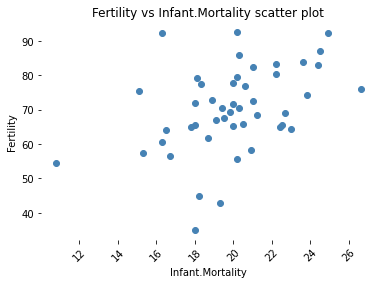

In [230]:
# CREATE A BASIC SCATTER PLOT WITH PLT

plt.clf() # this command is hear to clear any previous plot. when something doesn't make sense on your plot,
#use that, it may be settings of your previous plot interfering

# We start by creating 2 objects: fig and axes
# fig is the figure, a container that will host 1 or more plots.
# axes is the collection of plots that will be displayed on fig.
# it's called axes and not plots because 1 plot is made of axes (x axis and y axis). 

fig, axes = plt.subplots() # here the axes object will contain only 1 plot

# now let's plot some data

df = swiss.copy() #if you don't use .copy(), python will think that df is swiss, and any modification you make to df
# will also be made to swiss, which is confusing, so whatch out

x_axis = 'Infant.Mortality'
y_axis = 'Fertility'

axes.scatter(x=df[x_axis], y=df[y_axis], color="steelblue", marker ='o')

# Set a title
axes.set_title(y_axis+" vs "+x_axis+" scatter plot")

# set x and y axes labels
axes.set_ylabel(y_axis)
axes.set_xlabel(x_axis)


# hide the frame around the plot, to avoid overcrowding 
for position in axes.spines.keys():
  axes.spines[position].set_visible(False)

# rotate the x ticks labels
x_ticks_labels = axes.get_xticks() # retrieve the ticks labels
x_ticks_labels_modified = [int(x) for x in x_ticks_labels] # turn labels into integers (otherwise they become floats for some reasons)
axes.set_xticklabels(x_ticks_labels_modified, rotation = 45, ha="center") # set the labels with a 45 degrees rotation

# save the file. useful if you then want to integrate it in an html code and/or make a pdf out of it
plt.savefig("fig.png",bbox_inches='tight') # the figure will be save as a png file in your repository
plt.show()

The following images come from this [Must read Matplotlib for nerds](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo).

# HIGH LEVEL STRUCTURE IN MATPLOTLIB
![fig and axes structure >](fig_axes_axis.png)

# STRUCTURE INSIDE AN AXES OBJECT
![everything_is_an_artist >](everything_is_an_artist.png)

<Figure size 432x288 with 0 Axes>

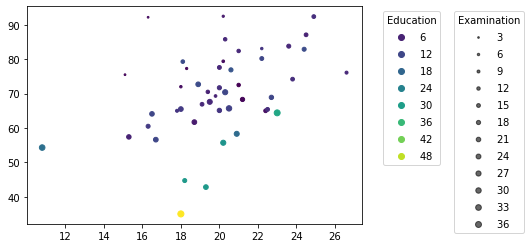

In [288]:
plt.clf()

fig, axes = plt.subplots()

df = swiss.copy()

x_axis = 'Infant.Mortality'
y_axis = 'Fertility'
colors = 'Education'
sizes = 'Examination'

scatter = axes.scatter(x=df[x_axis], y=df[y_axis], c=df[colors], s= df[size], marker ='o') 
# watch out, the argument for the color is not "color" this time, it's just c. 
# the c argument allows us to pass a series of values that will be mapped to a color gradient, instead of a single color
# s is the argument for the size of the dots
# instead of just using axes.scatter(), we created a variable called scatter equale to axes.scatter()
# the reason is that we will need to extract the legend elements later from scatter


# It's beautiful and everything but the tricky part is adding a legend for both size and colors

# First we create a legend for the colors.
legendcolors = axes.legend(*scatter.legend_elements(), title=colors,
                    loc="upper right", bbox_to_anchor=(1.25, 1)) 
# Instead of just adding the legend to the axes with axes.legend(), we assign the outcome to a variable legendcolors.
# the reason is that, when we create the size legend just below, we will overwrite our color legend
# So we need to add a new container (called a new artist) and give it our color legend:
axes.add_artist(legendcolors)

# Now we can add safely a legend to the axes for the sizes
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
axes.legend(handles, labels, title=sizes, loc="upper right", bbox_to_anchor=(1.5, 1))
# couple of things to note:
# we used loc = 'upper right' to place the legend on the top right corner
# then we used bbox_to_anchor to move the legend further to the right, so it is outside the plot

plt.show()

In [ ]:
# SHOW MORE THAN 3 DIMENSIONS WITH SEABORN

# the iris dataset has 5 dimensiond
print(iris.head())

# How do we plot as many as possible?
x_axis = 'Sepal.Length'
y_axis = 'Petal.Length'
sizes_column = 'Sepal.Width'
colors_column = 'Species'

import seaborn as sns

sns.relplot(x=x_axis, y=y_axis, hue=colors_column, size=sizes_column,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, aspect = 1.8, data=iris)

plt.show()

# Why aren't we using fig, axes = plt.suplots() and ax = axes inside the relplot function?
# it's because the relplot function returns a figure, not just an axes object, so that wouldn't work
# sns is full of little inconsistencies like that, so use it mindfully. 
# when we use displot later on, there is no problem

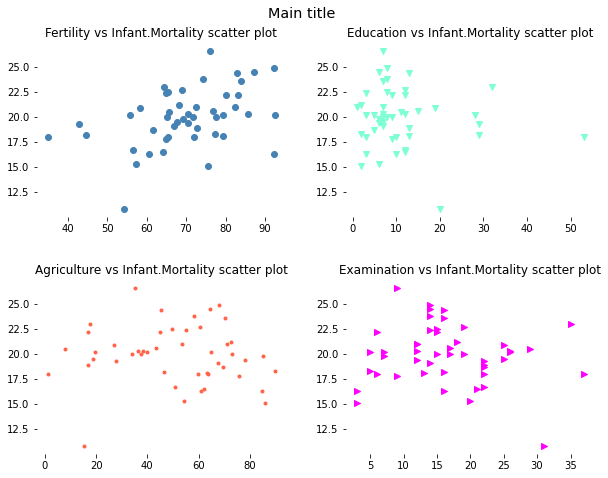

In [32]:
# CREATE A MULTIPLE PLOTS FIGURE WITH PLT

# Here we create 4 plots that will be arranged on 2 rows and 2 columns.
# We use figsize to increase the figure size and leave enough space for all plots. The first number is the 
# width, the second is the height. The default values are: (6.4,4.8)
fig, axes = plt.subplots(2,2, figsize=(9,7)) 


# We access each plot in the object axes using indexing. in our case axes has 2 plots on 2 rows, so we 
# need 2 indices to identify the plot: one for the row, one for the column: axes[0,0] would be the top 
# left plot, axes[0,1] the top right plot, axes[1,0] the bottom left plot and axes[1,1] the bottom right plot.
# Note that if we have only 1 row or one column, for example with plt.subplots(1,2), then only one index is 
# needed, and we would simply use, for example for the first plot: axes[0]

# now let's plot some data
axes[0,0].scatter(x=swiss.Fertility, y=swiss['Infant.Mortality'], color="steelblue", marker ='o')
axes[0,1].scatter(x=swiss.Education, y=swiss['Infant.Mortality'], color="aquamarine", marker='v')
axes[1,0].scatter(x=swiss.Agriculture, y=swiss['Infant.Mortality'], color="tomato", marker ='.')
axes[1,1].scatter(x=swiss.Examination, y=swiss['Infant.Mortality'], color="fuchsia", marker='>')


# Set a title for each subplot
axes[0,0].set_title("Fertility vs "+x_axis+" scatter plot")
axes[0,1].set_title("Education vs "+x_axis+" scatter plot")
axes[1,0].set_title("Agriculture vs "+x_axis+" scatter plot")
axes[1,1].set_title("Examination vs "+x_axis+" scatter plot")

# hide frames
for position in axes[0,0].spines.keys():
  axes[0,0].spines[position].set_visible(False)
  axes[0,1].spines[position].set_visible(False)
  axes[1,0].spines[position].set_visible(False)
  axes[1,1].spines[position].set_visible(False)

# add space between subplots
fig.tight_layout(pad=3.0) #default padding is 1.08

# add title to the whole figure
fig.suptitle('Main title', size='x-large') # default title size is 'large'

plt.show()

<Figure size 432x288 with 0 Axes>

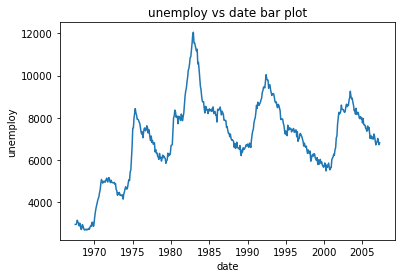

In [47]:
# MAKE A PLOT LINE

plt.clf()

fig, axes = plt.subplots()

df = economics.copy()

x_axis = 'date'
y_axis = 'unemploy'

axes.plot(df[x_axis], df[y_axis])

# Set a title
axes.set_title(y_axis+" vs "+x_axis+" bar plot")

# set x and y axes labels
axes.set_ylabel(y_axis)
axes.set_xlabel(x_axis)

# save the file. useful if you then want to integrate it in an html code and/or make a pdf out of it
plt.savefig("fig.png",bbox_inches='tight') # the figure will be save as a png file in your repository
plt.show()

number of days:  14519


<Figure size 432x288 with 0 Axes>

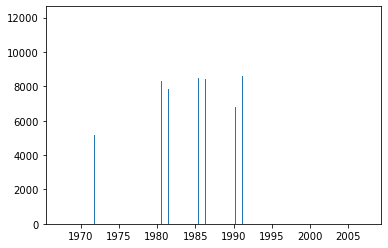

In [48]:
# MAKE A BARPLOT - the problem of the width

plt.clf()

# Lines are often reserved to represent ratios, and bars to represent amounts, so we could also have to use 
# a bar plot
fig, axes = plt.subplots()

# The default width in a bar plot is 0.8, it is expressed 'data' units. Here we have dates, so the unit is days.
ndays = (economics['date'].max() -  economics['date'].min()).days
print("number of days: ",ndays)

# We have 14519 days, so the default width will be 0.8/14519 = 0.000055100213
# That's 0.0055100213 % of the x axis' width. It's too narrow to be displayed well.
# Very few bars, if any, are appearing

axes.bar(economics['date'], economics['unemploy'])
plt.show()

<Figure size 432x288 with 0 Axes>

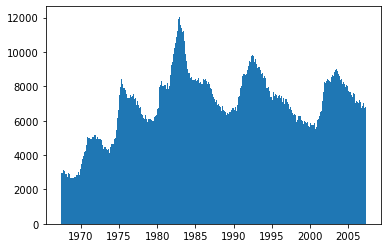

In [49]:
# MAKE A BARPLOT - the solution modifying the width
plt.clf()

fig, axes = plt.subplots()

# Let's pass a width that will cover a full month (31 units of data)
axes.bar(economics['date'], economics['unemploy'],width=31)

plt.show()

<Figure size 432x288 with 0 Axes>

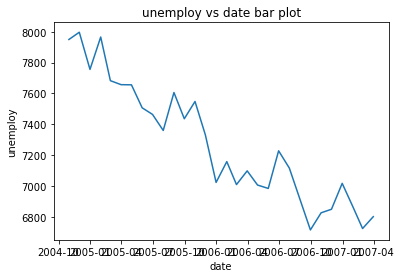

In [50]:
# DATE AXIS: the problem

plt.clf()

# matplotlib sometimes doesn't display the date in the best way

fig, axes = plt.subplots()

df = economics.copy().tail(30)

x_axis = 'date'
y_axis = 'unemploy'

axes.plot(df[x_axis], df[y_axis])

# Set a title
axes.set_title(y_axis+" vs "+x_axis+" bar plot")

# set x and y axes labels
axes.set_ylabel(y_axis)
axes.set_xlabel(x_axis)
plt.show()

date labels in matplotlib are numbers:  [12692. 12784. 12874. 12965. 13057. 13149. 13239. 13330. 13422. 13514.
 13604.]


<ipython-input-51-10ca1cc641b4>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(ticklabels, rotation = 45, ha="center")


<Figure size 432x288 with 0 Axes>

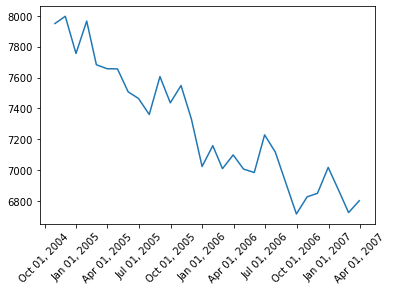

In [51]:
# CUSTOMIZE A DATE AXIS: the solution

plt.clf()

fig, axes = plt.subplots()
axes.plot(df[x_axis], df[y_axis])

x_ticks_labels = axes.get_xticks() # extract the a axis ticks labels
print("date labels in matplotlib are numbers: ",x_ticks_labels)
# these labels are not dates because matplotlib turns dates into number in the background, so let's change
# them back to dates:

import matplotlib.dates as mdates 
x_ticks_labels_dates = mdates.num2date(x_ticks_labels)

# Now we can format them. The default, with this many dates, shows only the year and month, as numbers. 
# Let's add the day (%d) and show the month as text (%b), just for the example
ticklabels = [item.strftime('%b %d, %Y') for item in x_ticks_labels_dates]
# And let's replace the labels on the plot
axes.set_xticklabels(ticklabels, rotation = 45, ha="center")
plt.show()

# Here's the full list of dates format: https://www.programiz.com/python-programming/datetime/strftime

<ipython-input-52-e10660a9cbf3>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


<Figure size 432x288 with 0 Axes>

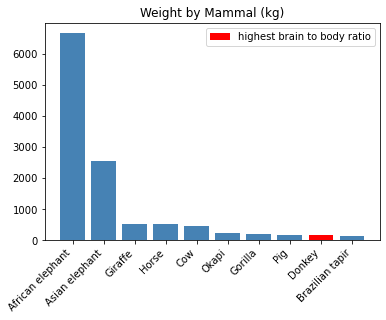

In [52]:
plt.clf()

# HIGHLIGHT 1 DATA POINT
fig, axes = plt.subplots() 

# First let's plot every animal's weight with a soft color
axes.bar(x=mammals.index, height=mammals.body, color = 'steelblue')

# Now let's plot over the previous plot only the datapoint we want to highlight with a bright color
donkey = mammals[mammals.index=='Donkey']
axes.bar(x=donkey.index, height=donkey.body, color = 'red', label="highest brain to body ratio") #let's use a label
axes.legend() # and let's add a legend to display the label

# Set a title
axes.set_title("Weight by Mammal (kg)")

# Rotate the ticks labels
plt.draw() # The tick labels are not populated until the figure is drawn so the method axes.get_xticklabels() 
# would return only the positions of the ticks and not the mammals names if we didn't run first plt.draw!
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
plt.show()

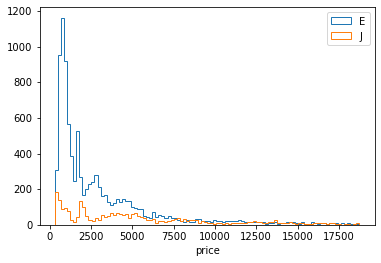

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa


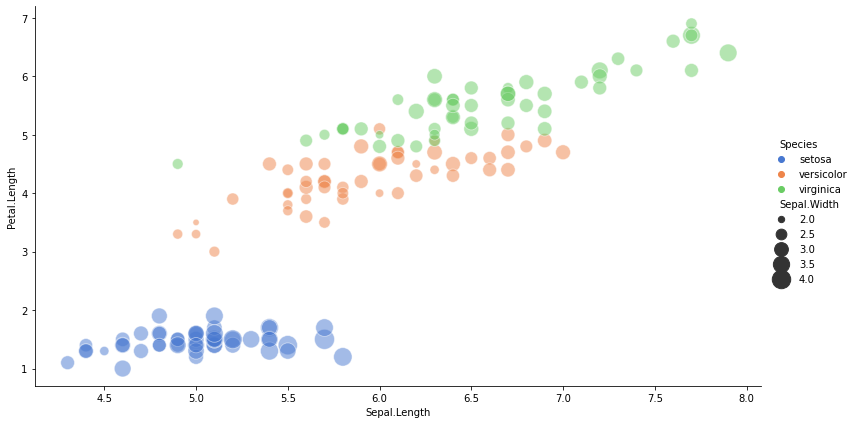

#  <font color='blue'>Present the results of an AB test</font>

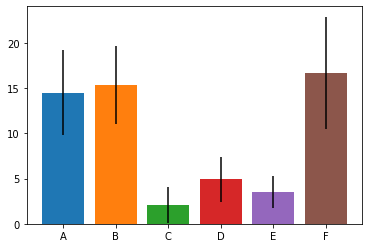

In [207]:
# COMPARE MEANS AND DISPLAY A CONFIDENCE INTERVAL

insect_sprays = data('InsectSprays')

fig, axes = plt.subplots()

for sp in insect_sprays.spray.unique():
    insect_sprays_subset = insect_sprays[insect_sprays.spray==sp]
    axes.bar(sp, insect_sprays_subset['count'].mean(), yerr=insect_sprays_subset['count'].std())

plt.show()



Text(17.166666666666668, 2, 'Mean')

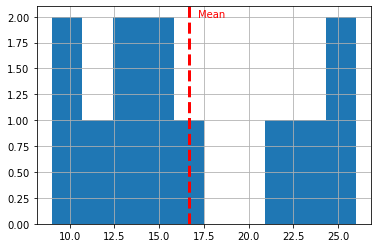

In [206]:
# About error bars & statistical inference:
# Error bars are usually 1 standard deviation long. 
# Best explanation ever of what standard deviation is: https://www.mathsisfun.com/data/standard-deviation.html

# If the error bar is long, the individual values are not close to the mean, they are all over the place
# so we consider the mean of our sample less likely to be identical to the mean of the real, entire, population. 
# It may be at this level just because we have too few observations and may be very different if we did more tests.

# The error bars can sometimes be 1 standard error long instead of 1 standard deviation. 
# The standard error is calculated as follows: (standard deviation) / (square root of the number of observations)
# So it can be much smaller than the standard deviation. The idea is that, even if the values are all over the place,
# having a lot of observations means that we are more confident that the mean of our sample is representative of 
# the mean of the entire population, so we make smaller bars when we have many observations

# Example of how the individual values are quite far from the mean for spray F:
mean_of_count_for_spray_f = insect_sprays[insect_sprays.spray=='F']['count'].mean()
hist_spray_f = insect_sprays[insect_sprays.spray=='F']['count'].hist()
hist_spray_f.axvline(mean_of_count_for_spray_f, color='red', linestyle='dashed', linewidth=3)
hist_spray_f.annotate("Mean",(mean_of_count_for_spray_f+0.5,2),color='red')

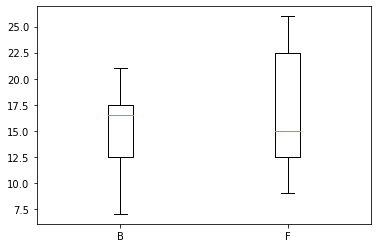

In [227]:
# COMPARE SEVERAL POPULATIONS DISTRIBUTION WITH BOXPLOTS
fig, axes = plt.subplots()

insect_sprays_b = insect_sprays[insect_sprays.spray=='B']
insect_sprays_f = insect_sprays[insect_sprays.spray=='F']

axes.boxplot([insect_sprays_b['count'], insect_sprays_f['count']])
axes.set_xticklabels(['B','F'])

plt.show()

No handles with labels found to put in legend.


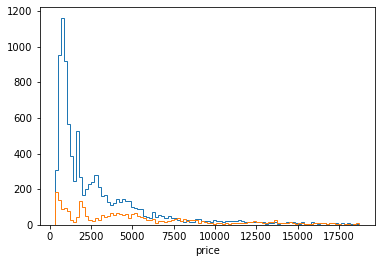

In [224]:
# PLOT HISTOGRAMS TO SHOW A POPULATION DISTRIBUTION

fig, axes = plt.subplots()

diamonds = data('diamonds')

diamonds = diamonds[diamonds.color.isin(['E','J'])]

for c in diamonds.color.unique():   
    diamonds_subset = diamonds[diamonds.color == c]
    axes.hist(diamonds_subset['price'], label=c, histtype='step', bins =100)
    axes.set_xlabel('price')

ax.legend()
plt.show()

/home/julien.massardier/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/julien.massardier/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


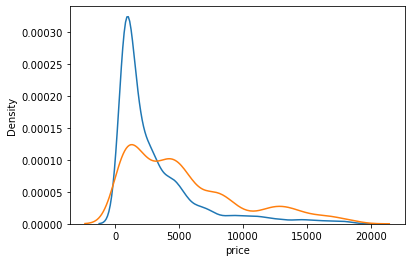

In [225]:
# PLOT DENSITY CURVES WITH SEABORN TO SHOW A POPULATION DISTRIBUTION

fig, axes = plt.subplots()

for c in diamonds.color.unique():   
    diamonds_subset = diamonds[diamonds.color == c]
    sns.distplot(diamonds_subset['price'], label=c, hist=False, ax = axes)
    axes.set_xlabel('price')

ax.legend()

plt.show()

In [ ]:
# QUESTIONS TO ASK AT THE END OF EACH PLOT

# IS IT CRYSTAL CLEAR WHAT INFORMATION IS DISPLAYED OR DO I NEED MORE LABELS?
# CAN I REMOVE ANYTHING WITHOUT LOSING IMPORTANT INFORMATION?
# Eg. if the x axis is a date, no need for an x label, if the title says "revenue" and the y axis is formatted
# with $, no need to say "revenue in $" in the title, and no need for a y label either etc.
# IS THE INFORMATION I WANT TO SHOW EVIDENT? IS THERE ANYTHING DISTRACTING?
# Eg. use soft colors for what's not important, bright colors for what you want to draw attention to

In [54]:
# RULES OF PLOTTING

# Keep a high data-ink ratio: avoid unnecessary:
# Use of 3D effects, Background images, Shadow effects, Unnecessary borders, and Unnecessary grid lines. 

# Remove shadow effects
# Remove chart junk
# Remove the background
# Remove redundant labels
# Remove unnecessary borders and grid lines
# Reduce colors
# Remove the special effects of word bubbles
# Remove bolding or using font to communicate information
# Less is more effective: simpler titles and labels
# Keep in mind the data density

In [55]:
# RULES OF USING COLORS

# 1. Use color only when needed to serve a particular communication goal.
# 2. Use different colors only when they correspond to differences of meaning in the data.
# 3. Use soft, natural colors to display most information and bright and/or dark colors to highlight 
# information that requires greater attention
# 4. Non-data components of tables and graphs should be displayed just visibly enough to perform their role, 
# but no more so, for excessive salience could cause them to distract attention from the data.

# If you like this topic, here's the reference: 
# http://www.perceptualedge.com/articles/visual_business_intelligence/rules_for_using_color.pdf

In [56]:
# When plotting subplots that show the same data for 2 subsets: use plt.subplots(1,2, sharey = True) so
# the y axes are aligned

In [57]:
# set the date as an index
economics.set_index('date', inplace=True)

#and then you can easily filter a date range
economics['2005-01-01':'2005-01-31']
economics.query("date>='2006'")

,pce,pop,psavert,uempmed,unemploy
date,,,,,
2006-01-31,9079.2,298645,-0.3,8.9,7158
2006-02-28,9123.8,298849,-0.4,8.5,7009
2006-03-31,9175.2,299079,-1.0,8.5,7098
2006-04-30,9238.6,299310,-1.6,8.5,7006
2006-05-31,9270.5,299548,-1.5,7.6,6984
2006-06-30,9338.9,299801,-1.7,8.2,7228
2006-07-31,9352.7,300065,-1.5,8.4,7116
2006-08-31,9348.5,300326,-1.0,8.1,6912
2006-09-30,9376.0,300592,-0.8,8.0,6715


<ipython-input-93-38e97cd5d878>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(ticklabels, rotation=45, ha='right')


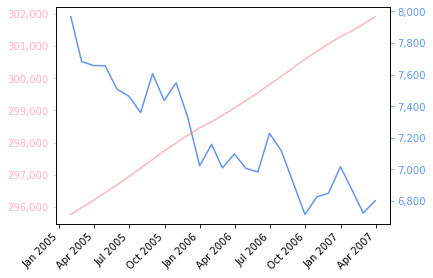

In [93]:
# Use 2 differents axes on the same plot

economics_recent = economics.query("date>='2005'")

fig, axes = plt.subplots()

# plot a metric on the left y axis
axes.plot(economics_recent.index, economics_recent['pop'], color='lightpink')
axes.tick_params('y', colors='lightpink')

# create an additional y axis (twin x means it uses the x axis of our object 'axes')
axes_twin = axes.twinx()

# plot another metric on the additional y axis
axes_twin.plot(economics_recent.index, economics_recent['unemploy'], color='cornflowerblue')
axes_twin.tick_params('y', colors='cornflowerblue')

# Let's clean up the date labels on the x axis
x_ticks_labels = axes.get_xticks()
x_ticks_labels_dates = mdates.num2date(x_ticks_labels)
ticklabels = [item.strftime('%b %Y') for item in x_ticks_labels_dates]
axes.set_xticklabels(ticklabels, rotation=45, ha='right')

# Let format the y axes numbers
import matplotlib.ticker as tkr
axes.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))
axes_twin.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

plt.show()

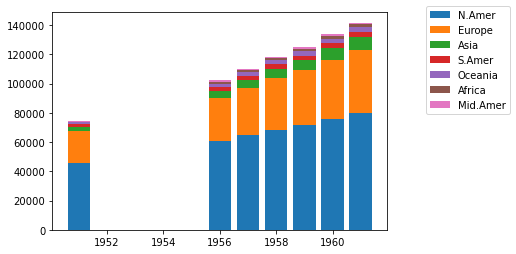

In [112]:
# STACKED BAR PLOT

fig, axes = plt.subplots()

worldphones = data('WorldPhones')

bottom = 0 # bottom is where the bar starts being drawn
for col in worldphones.columns:
    axes.bar(worldphones.index, worldphones[col], bottom = bottom, label=col)
    bottom += worldphones[col] #each time that we draw a bar, we raise the bottom by the height of the bar previously
    # drawned so that in the end they appear stacked

axes.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

In [171]:
for x in data().dataset_id:
    #f len(data(x).columns)>3:
    print(">>>>",x,data(x).shape[0])
    #rint(data(x).head(1))

>>>> AirPassengers 144
>>>> BJsales 150
>>>> BOD 6
>>>> Formaldehyde 6
>>>> HairEyeColor 32
>>>> InsectSprays 72
>>>> JohnsonJohnson 84
>>>> LakeHuron 98
>>>> LifeCycleSavings 50
>>>> Nile 100
>>>> OrchardSprays 64
>>>> PlantGrowth 30
>>>> Puromycin 23
>>>> Titanic 32
>>>> ToothGrowth 60
>>>> UCBAdmissions 24
>>>> UKDriverDeaths 192
>>>> UKgas 108
>>>> USAccDeaths 72
>>>> USArrests 50
>>>> USJudgeRatings 43
>>>> USPersonalExpenditure 5
>>>> VADeaths 5
>>>> WWWusage 100
>>>> WorldPhones 7
>>>> airmiles 24
>>>> airquality 153
>>>> anscombe 11
>>>> attenu 182
>>>> attitude 30
>>>> austres 89
>>>> cars 50
>>>> chickwts 71
>>>> co2 468
>>>> crimtab 42
>>>> discoveries 100
>>>> esoph 88
>>>> euro 11
>>>> faithful 272
>>>> freeny 39
>>>> infert 248
>>>> iris 150
>>>> islands 48
>>>> lh 48
>>>> longley 16
>>>> lynx 114
>>>> morley 100
>>>> mtcars 32
>>>> nhtemp 60
>>>> nottem 240
>>>> npk 24
>>>> occupationalStatus 8
>>>> precip 70
>>>> presidents 120
>>>> pressure 19
>>>> quakes 1000
>>>> ran

/home/julien.massardier/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


>>>> hr1420 147849
>>>> l51 51
>>>> lukas 85
>>>> mao 340
>>>> mfblong 3000
>>>> mhtdata 159312
>>>> nep499 499
>>>> diamonds 53940
>>>> economics 478
>>>> midwest 437
>>>> movies 58788
>>>> mpg 234
>>>> msleep 83
>>>> presidential 10
>>>> seals 1155
>>>> Arbuthnot 82
>>>> Bowley 45
>>>> Cavendish 29
>>>> ChestSizes 16
>>>> CushnyPeebles 11
>>>> CushnyPeeblesN 11
>>>> Dactyl 60
>>>> DrinksWages 70
>>>> Fingerprints 36
>>>> Galton 928
>>>> GaltonFamilies 934
>>>> Guerry 86
>>>> Jevons 50
>>>> Langren.all 61
>>>> Langren1644 12
>>>> Macdonell 924
>>>> MacdonellDF 3000
>>>> Michelson 100
>>>> MichelsonSets 20
>>>> Minard.cities 20
>>>> Minard.temp 9
>>>> Minard.troops 51
>>>> Nightingale 24
>>>> OldMaps 468
>>>> PearsonLee 746
>>>> PolioTrials 8
>>>> Prostitutes 516
>>>> Pyx 72
>>>> Quarrels 779
>>>> Snow.deaths 578
>>>> Snow.polygons 54
>>>> Snow.pumps 13
>>>> Snow.streets 1241
>>>> Wheat 53
>>>> Wheat.monarchs 12
>>>> Yeast 36
>>>> YeastD.mat 20
>>>> ZeaMays 15
>>>> barley 90
>>>> envir